In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, convolve
import os

In [42]:
df_1 = pd.read_csv("Normalized_Data\\scans_angle_2_8125_pos_4_rot_1_normalized.csv")
df_2 = pd.read_csv("Normalized_Data\\scans_angle_2_8125_pos_5_rot_1_normalized.csv")
df_3 = pd.read_csv("Normalized_Data\\scans_angle_2_8125_pos_6_rot_1_normalized.csv")

In [53]:
# delete all rows where the shape is prisma
df_2 = df_2[df_2['shape'] != 'prisma']

In [54]:
df_2.groupby('shape').mean()

,0.0,2.8125,5.625,8.4375,11.25,14.0625,16.875,19.6875,22.5,25.3125,...,331.875,334.6875,337.5,340.3125,343.125,345.9375,348.75,351.5625,354.375,357.1875
shape,,,,,,,,,,,,,,,,,,,,,
cube,0.0,0.037136,0.073395,0.103065,0.123445,0.132961,0.131333,0.119553,0.099719,0.074723,...,-0.011097,-0.040129,-0.068874,-0.093694,-0.111252,-0.118949,-0.115277,-0.100032,-0.074361,-0.040639
cylinder,0.0,0.008177,0.008871,0.005432,-0.001932,-0.011830,-0.021935,-0.029465,-0.031814,-0.027204,...,0.034699,0.037060,0.032411,0.023094,0.012037,0.002075,-0.004649,-0.007090,-0.005437,-0.000975
pentagon,0.0,0.083230,0.139533,0.183741,0.211862,0.221661,0.212898,0.187320,0.148410,0.100936,...,-0.076124,-0.117567,-0.155251,-0.184367,-0.200696,-0.201179,-0.184370,-0.150693,-0.102483,-0.043772


In [48]:
pd.concat([df_1, df_2, df_3], axis=0, ignore_index=True).to_csv("Normalized_Data\\scans_angle_2_8125_pos_10_rot_1_normalized.csv", index=False)

In [22]:
data_folder = os.path.join(os.getcwd(), 'Logs')
files = os.listdir(data_folder)

In [23]:
def find_matching_files(file_list, angle, position):
    for file in file_list:
        # Prüfen, ob der Messwinkel und die Position im Dateinamen enthalten sind
        if f"angle_{angle}" in file and f"pos_{position}" in file:
            matching_file = os.path.join(data_folder, file)
    return matching_file

In [24]:
input_pos = input("Enter Position: ")
input_deg = input("Enter Angle: ")

In [25]:
def find_matching_files(file_list, angle, position):
    for file in file_list:
        if f"angle_{angle}" in file and f"pos_{position}" in file:
            matching_file = os.path.join(folder_path, file)
    return matching_file


folder_path = os.path.join(os.getcwd(), 'Logs')
files = os.listdir(folder_path)

scan_df = pd.read_csv(find_matching_files(files, input_deg, input_pos))
data_df = scan_df.iloc[:, :-3]

In [26]:
scan_df

,0.0,2.8125,5.625,8.4375,11.25,14.0625,16.875,19.6875,22.5,25.3125,...,343.125,345.9375,348.75,351.5625,354.375,357.1875,shape,position,sensor_rotation,angle
0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,100.0,99.0,cylinder,6,1,2.8125
1,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,100.0,99.0,99.0,99.0,99.0,99.0,cylinder,6,1,2.8125
2,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,cylinder,6,1,2.8125
3,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,cylinder,6,1,2.8125
4,99.0,100.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,cylinder,6,1,2.8125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,124.0,99.0,96.0,110.0,106.0,103.0,99.0,99.0,103.0,103.0,...,141.0,204.0,229.0,188.0,213.0,141.0,cube,6,1,2.8125
533,99.0,96.0,110.0,106.0,103.0,99.0,99.0,103.0,106.0,110.0,...,204.0,217.0,201.0,213.0,188.0,120.0,cube,6,1,2.8125
534,96.0,110.0,106.0,103.0,99.0,99.0,103.0,106.0,110.0,113.0,...,229.0,188.0,704.0,188.0,120.0,99.0,cube,6,1,2.8125
535,110.0,106.0,103.0,99.0,99.0,99.0,106.0,110.0,113.0,99.0,...,188.0,213.0,188.0,120.0,99.0,96.0,cube,6,1,2.8125


In [37]:
data_df.groupby('shape').mean()

,0.0,2.8125,5.625,8.4375,11.25,14.0625,16.875,19.6875,22.5,25.3125,...,331.875,334.6875,337.5,340.3125,343.125,345.9375,348.75,351.5625,354.375,357.1875
shape,,,,,,,,,,,,,,,,,,,,,
cube,149.818182,137.727273,173.727273,114.818182,105.909091,105.454545,103.363636,106.818182,105.181818,110.545455,...,183.818182,180.636364,181.818182,191.272727,196.090909,195.090909,235.181818,177.090909,170.272727,152.272727
cylinder,99.022814,99.038023,99.026616,99.030418,99.026616,99.034221,99.041825,99.019011,99.038023,99.022814,...,99.026616,99.030418,99.019011,99.064639,99.045627,99.038023,99.038023,99.026616,99.041825,99.022814
pentagon,154.577947,154.532319,154.479087,154.650190,153.129278,154.509506,154.395437,155.368821,153.406844,154.030418,...,151.376426,151.498099,151.821293,152.847909,152.946768,153.068441,152.737643,153.505703,153.410646,153.353612


In [28]:
def header_to_int(df: pd.DataFrame):
    columns = df.iloc[:, :-1].columns.values
    columns_int = np.array([float(column) for column in columns])
    return columns_int
    

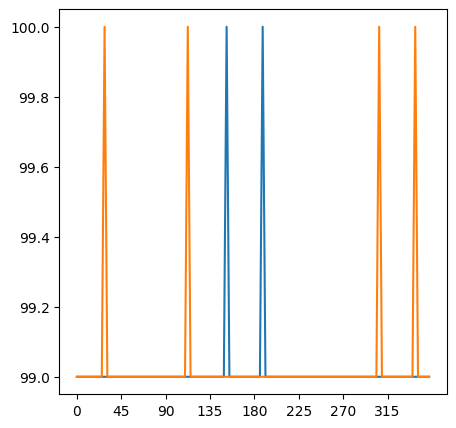

In [29]:
fig, ax = plt.subplots(figsize=(5,5))
for i in range(90,92):
    ax.plot(header_to_int(data_df), data_df.iloc[i, :-1])
    ax.set_xticks(np.arange(0,360,45))


In [38]:
def calculate_shift_correlation(series1: pd.Series, series2: pd.Series, max_shift: int = 10):
    correlations = []
    shifts = range(-max_shift, max_shift + 1)
    for shift in shifts:
        if shift > 0:
            corr = np.corrcoef(series1[shift:], series2[:-shift])[0, 1]
        elif shift < 0:
            corr = np.corrcoef(series1[:shift], series2[-shift:])[0, 1]
        else:
            corr = np.corrcoef(series1, series2)[0, 1]
        correlations.append(corr)
        
    max_corr_shift = shifts[np.argmax(correlations)]
    return max_corr_shift

shift = calculate_shift_correlation(data_df.iloc[90], data_df.iloc[100])


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U8')) -> None

In [ ]:
shift

1

In [ ]:
synchronized_data = np.concatenate((df_data.iloc[100,-shift:],df_data.iloc[100].shift(shift).iloc[shift:]))

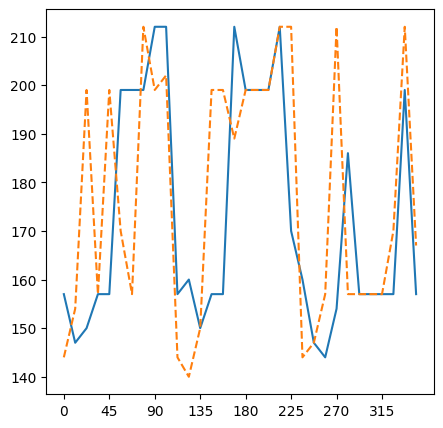

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(header_to_int(df_data), df_data.iloc[90, :])
ax.set_xticks(np.arange(0,360,45))
ax.plot(header_to_int(df_data), synchronized_data, '--')
plt.show()